 

# Project 2. Investigate a Dataset: No-show Medical Appointments


### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll analyze a medical appointment dataset and find out important factors that affect patient's no-show for their appointment. I'll first assess and clean up the data for easy analysis. Then I'll do exploratory data analysis(EDA) to understand the variables and the relationships between variables and visualize the results. This dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The variables names are self-explanatory. A number of characteristics about the patient are included.
- 'ScheduledDay' tells us on what day the patient set up their appointment.
- 'Neighborhood' indicates the location of the hospital.
- 'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Detailed description of the dataset can be found at: https://www.kaggle.com/joniarroba/noshowappointments

### Questions Under Investigation:
1. What's the percentage of missed appointments?
2. Is SMS reminder helpful for patients to show-up to the appointment?
3. Is welfare program Bolsa Familia helping patients to show up for their appointments?
4. Which neighbourhood has the highest number of no-shows?
5. Are health condition variables: hypertension, diabetes, alcoholism, handicap related to no-show?
6. Is age related to no-show? What is the age distribution for shows and no-shows?

<a id='wrangling'></a>
## Data Wrangling

First, load in the data. Then investigate the data and check if there are inconsistencies or problems in the data that will need to be cleaned up. The next step is to trim and clean the dataset for analysis.  

### General Properties

### 1. Import Packages & Load Dataset

In [1]:
# Import packages for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load data to a dataframe 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### 2. Assessing Data

### _a. Initial Observations and Concerns_

In [3]:
# Inspect data 
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Observations and Concerns**:
> - Dataset comprises of 110,527 observations and 14 characteristics.
> - What is the primary key for the database? It's worth checking PatientId and AppointmentID to see if their values are unique.
> - Some typos can be found here: 'Hipertension' should be 'Hypertension', 'Handcap' should be 'Handicap'. 
> - Replace '-' with '_' in 'No-show': No-show' should be 'No_show'.
> - It's better to use lowercase for the lables. After that it's better to add '_': 'Patient_ID', 'Appointment_ID', 'Scheduled_Day', 'Appointment_Day' to make these labels more readable.
> - Replace 'Yes' and 'No' with 1 and 0 to make the data easier for analysis.

In [4]:
# Check data types & find whether they contain null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Observations and concerns** 
> - No variable column has null/missing values.
> - Data type for PatientId should be int.
> - Data type for ScheduledDay and AppointmentDay should be datatime

In [5]:
# Check for any duplicates
df.duplicated().sum()

0

 > **Observations**
 > - There is no dulicate record.

### _b. Insight on Selected Variables_

#### `PatientId` & `AppointmentID`

Check primary key(s) for the dataset. Since it's quite likely that a patient can make multiple appointments. Check whether PatientId is unique for each record. Check if AppointmentID is unique for every appointment. 

In [6]:
# Number of unique patients 
df.PatientId.nunique()

62299

In [7]:
# Number of unique appointments 
df.AppointmentID.nunique()

110527

> #### Observations: 
> The primary key for this dataset is AppointmentID. There are 62,299 patients in the database and 110, 527 appointments in the dataset, meaning that there are patients with multiple appointments. It's important to know that each record/row represents one appointment not the patient. 

#### `Handcap`

In [8]:
# Check values for Handcap
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> #### Observations: 
> Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received all contain boolean values. All these variables use 1 and 0 except Handcap, which has four values 0-4, probably indicating the disability level of the patient. In this analysis, since the level of handicap does not matter, so I'll use 1 and 0 which stand for 'handicap' and 'no handicap' respectively. I'll reassign values higher than 0 to 1 and correct the typo of handcap(should be handicap) in data cleaning process.

#### `Age`

In [9]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
df[df.Age == -1].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> #### Observation:
> Age cannot be -1. However, the dataset creator mentioned that these type of patients are considered babies not born yet, pregnant woman. So I'll just leave it there. Here's the link for reference: https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457

### 3. Data Cleaning

After inspecting the structure of the data and any problems that need to be cleaned, perform those cleaning steps in this section.

#### 1. Rename Columns
- Fix typos: 'Hipertension' should be 'Hypertension', 'Handcap' should be 'Handicap'. 
- Replace '-' with '_' in 'No-show': No-show' should be 'No_show'
- Lowercase lables
- Add '_': 'Patient_ID', 'Appointment_ID', 'Scheduled_Day', 'Appointment_Day' for readability

In [11]:
# Rename Hipertension to Hypertension, Handcap to Handicap
# No-show to No_Show
# PatientId to Patient_ID, AppointmentID to Appointment_ID, ScheduledDay to Scheduled_Day, AppointmentDay to Appointment_Day
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show', 
                     'PatientId': 'Patient_ID', 'AppointmentID': 'Appointment_ID', 'ScheduledDay': 'Scheduled_Day', 
                     'AppointmentDay': 'Appointment_Day'}, inplace = True)

# Confirm changes
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# Lowercase labels
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Confirm changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### 2. Fix Data Types
`patient_id`: convert float to int 

In [13]:
# patient_id: convert float to int
df['patient_id'] = df['patient_id'].astype('int64')

# Check to confirm change
df.patient_id.dtypes

dtype('int64')

`scheduled_day`: convert object to datetime 
<br>`appointment_day`: convert object to datatime

In [14]:
# scheduled_day, appointment_day: convert object to datetime
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

# Check if the changes are inplace
df.dtypes

patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

#### 3. Convert Values 

`no_show`: convert values to 0 and 1

In [15]:
# Convert values in column no_show from 'Yes' and 'No' to 1 and 0
df['no_show'] = np.where(df['no_show'] == 'Yes', 1, 0)

# Check whether the change is placed
df.no_show.unique()

array([0, 1], dtype=int64)

`handicap`: convert values to 0 and 1

In [16]:
# Convert handicap values higher than 0 to 1
df['handicap'] = np.where(df['handicap'] > 0, 1, 0)

# Check whether the change has been applied
df.handicap.unique()

array([0, 1], dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What's the percentage of missed appointments?

In [17]:
# Find the number of shows vs. no-shows
df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

Recall that we have replaced 'Yes' with 1 and 'No' with 0 previously in the data cleaning process. 1 stands for no-show, and 0 stands for show.  

In [18]:
# Use value_counts with normalize=True to return the relative frequencies of the unique values
ratio = df['no_show'].value_counts(normalize=True)
print(ratio)

0    0.798067
1    0.201933
Name: no_show, dtype: float64


In [19]:
# Create a table with counts and ratio of no-shows and shows
status = df.groupby('no_show')['no_show'].size().reset_index(name='counts')
status.iloc[0,0] = "Show"
status.iloc[1,0] = "No-Show"
ratio = (ratio[0], ratio[1])
status['ratio'] = (format(ratio[0], '.0%'), format(ratio[1], '.0%'))
print('Counts and Proportion of shows and no-shows:')
status.head()

Counts and Proportion of shows and no-shows:


,no_show,counts,ratio
0,Show,88208,80%
1,No-Show,22319,20%


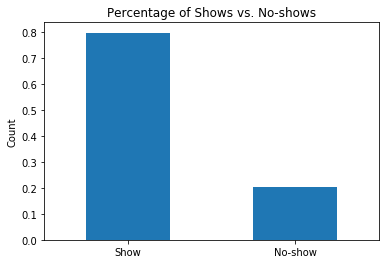

In [20]:
# Plot a bar chart
df['no_show'].value_counts(normalize=True).plot(kind='bar', title='Percentage of Shows vs. No-shows')

# Add axis titles and tick labels 
plt.ylabel('Count')
x = ('Show', 'No-show')
x_pos = np.arange(len(x))
plt.xticks(x_pos, x, rotation=0);

The table and chart show that out of the total 110,527 scheduled appointments, 20%(22,312) appointments were missed and 80%(88,168) were accomplished. `no_show` is a dependent variable. I'll take further investigations on the impact of independent variables.

### 2. Is SMS reminder helpful for patients to show-up to their appointment?

### _a. SMS received_

In [21]:
# Total number of appointments with SMS reminder
count_sms = df.query('sms_received==1')['sms_received'].count()
# Percentage
total = df.shape[0]
perct_sms = format(count_sms / total, '.0%')

print("There are {} appointments with SMS reminder. That is {} of total of {} appointments.".format(count_sms, perct_sms, total))

There are 35482 appointments with SMS reminder. That is 32% of total of 110527 appointments.


> 32%(35,482) appointments received SMS out of 110,527 appointments. Let's take a further look by checking the breakdown of shows and no-shows of appointments received SMS.

In [22]:
# Received sms, breakdown count of shows and no-shows
sms_yes = df.sms_received == 1   # Create a mask

df.no_show[sms_yes].value_counts()

0    25698
1     9784
Name: no_show, dtype: int64

In [23]:
# Percentage of shows and no-shows
yes_proportion = df.no_show[sms_yes].value_counts(normalize=True)
yes_proportion.head()

0    0.724255
1    0.275745
Name: no_show, dtype: float64

### _b. SMS **NOT** Received_

In [24]:
# Not received sms, breakdown of shows and no-shows
sms_no = df.sms_received == 0  # Create a mask

df.no_show[sms_no].value_counts()

0    62510
1    12535
Name: no_show, dtype: int64

In [25]:
# Percentage of shows and no-shows
no_proportion = df.no_show[sms_no].value_counts(normalize=True)
no_proportion.head()

0    0.832967
1    0.167033
Name: no_show, dtype: float64

### _c. Pie Chart_

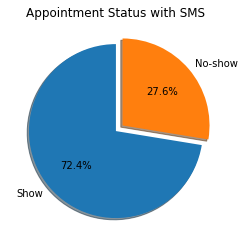

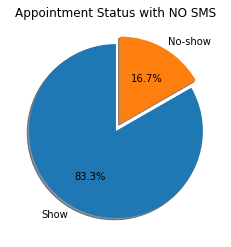

In [26]:
# Data to plot
labels = ['Show', 'No-show']
sms = [yes_proportion[0], yes_proportion[1]]
nosms = [no_proportion[0], no_proportion[1]]
explode = (0, 0.1) 
 
# Plot two pie charts
plt.figure(0)  
plt.pie(sms, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Appointment Status with SMS')

plt.figure(1)
plt.pie(nosms, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Appointment Status with NO SMS')

plt.show()

32%(35,482) appointments received SMS out of total 110,527 appointments. It's surprising to see that 27.6% of the appointments received SMS were missed, however only 16.7% of the appointments with NO sms reminder were missed. It seems that SMS reminder is not helping patient to show-up to their appointemt at all.

### 3. Is welfare program Bolsa Familia helping patients to show up for their appointments?

In [27]:
# Number of appointments with Bolsa Familia
count_bolsa = df.query('scholarship==1')['scholarship'].count()
# Percentage
perct_bolsa = format(count_bolsa / total, '.0%')

print("There are {} appointments with Bolsa Familia. That is {} of total {} appointments." \
      .format(count_bolsa, perct_bolsa, total))

There are 10861 appointments with Bolsa Familia. That is 10% of total 110527 appointments.


In [28]:
# With Bolsa
bolsa_yes = df.scholarship == 1   # Create a mask
bolsa_perct = df.no_show[bolsa_yes].value_counts(normalize=True)

# No Bolsa
bolsa_no = df.scholarship == 0  # Create a mask
nobolsa_perct = df.no_show[bolsa_no].value_counts(normalize=True)

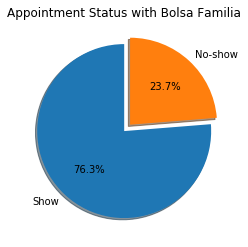

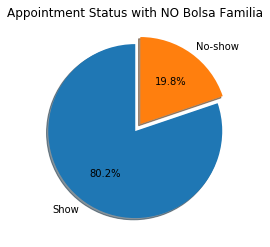

In [29]:
# Data to plot
#labels = ['Show', 'No-show']
bolsa = [bolsa_perct[0], bolsa_perct[1]]
nobolsa = [nobolsa_perct[0], nobolsa_perct[1]]
explode = (0, 0.1) 
 
# Plot two pie charts
plt.figure(0)  
plt.pie(bolsa, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Appointment Status with Bolsa Familia')

plt.figure(1)
plt.pie(nobolsa, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Appointment Status with NO Bolsa Familia')

plt.show()

There are 10,861 appointments with Bolsa Familia. That is 10% of total 110,527 appointments. For appointments with  Bolsa Familia 23.7% fail to come while for appointments with NO Bolsa Familia, the ratio is 19.8%. This is no clear indication that Bolsa Familia has to do with appointment attendance. 

### 4. Which neighbourhood has  the highest number of shows and no-shows?

### a.Top 10 neighbour with high no-shows

In [30]:
# Filter no-show appointments
df_noshow = df.query('no_show == 1')

# Top 10 with high no-shows
noshow_neighbourhood = df_noshow.groupby('neighbourhood').no_show.count().to_frame('counts').sort_values(by = 'counts', ascending=False)
noshow_neighbourhood.head(10)

,counts
neighbourhood,
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703
JESUS DE NAZARETH,696
JARDIM DA PENHA,631
CARATOÍRA,591
TABUAZEIRO,573


### b. Top 10 neighbourhood with high shows

In [31]:
# Filter show appointments
df_show = df.query('no_show == 0')

# Top 10 with high shows
show_neighbourhood = df_show.groupby('neighbourhood').no_show.count().to_frame('counts').sort_values(by = 'counts', ascending=False)
show_neighbourhood.head(10)

,counts
neighbourhood,
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635
CENTRO,2631
ITARARÉ,2591
TABUAZEIRO,2559
SANTO ANTÔNIO,2262


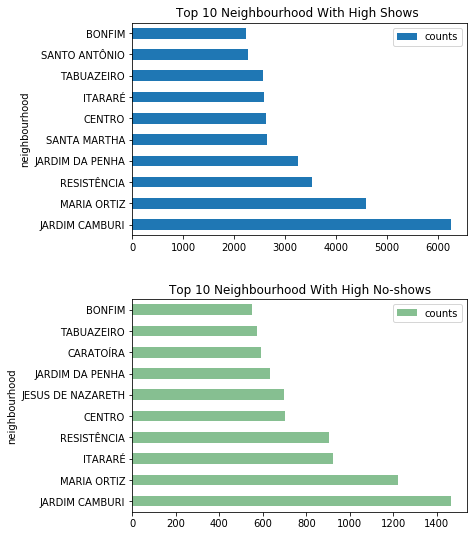

In [32]:
# Plot horizontal bar chart
fig, (ax1, ax2) = plt.subplots(2, 1)

# Top 10 neighbourhood with high shows
show_neighbourhood.head(10).plot.barh(ax=ax1, figsize=(6,9))
ax1.set_title("Top 10 Neighbourhood With High Shows ")

# Top 10 neighbourhood with high no-shows
noshow_neighbourhood.head(10).plot.barh(color='#86bf91', ax=ax2)
ax2.set_title("Top 10 Neighbourhood With High No-shows")

fig.subplots_adjust(hspace=0.3)

 We can see that JARDIM CAMBURI is the region with both highest and lowest number of attendance for the appointments. MARIA ORTIZ is the second highest in both cases. 

### 5. Are health condition variables: hypertension, diabetes, alcoholism, handicap related to no-show?

In [33]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0


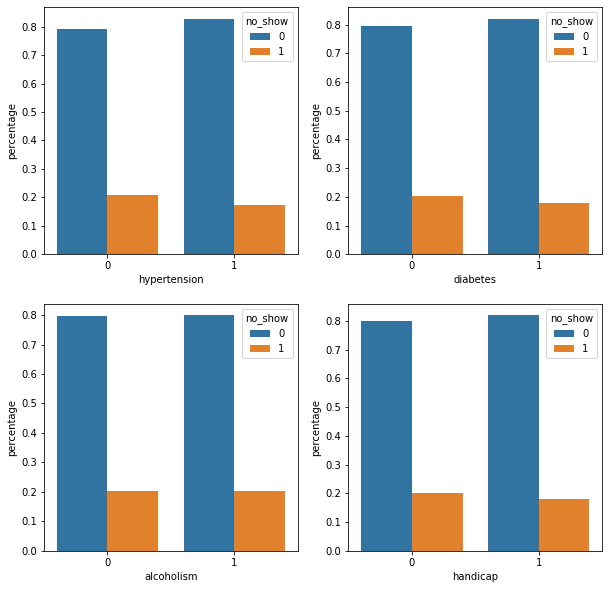

In [34]:
# Plot chart for different categorical variables 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

df['percentage'] = 0 # a dummy column to refer to
for col, ax in zip(['hypertension', 'diabetes', 'alcoholism', 'handicap'], axes.flatten()):
    counts = df.groupby([col, 'no_show']).count()
    perct_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(x=col, y='percentage', hue='no_show', data=perct_per_group, ax=ax)

The distribution for each health condition variable: hypertension, diabetes, alcoholism and handicap demonstrates similar patterns. The graphs all show around 20% no-show rate for patients with those health conditions. And for appointments made by patients without those health conditions, the no-show ratio was slightly lower than 20% for all other categories expect alcoholism. However, there's no clear indication that those variables are closely related to no-shows. 

### 6. What is the age distribution for shows and no-shows?

The mean age for patients not showing up for their appointment is 34.31766656212196


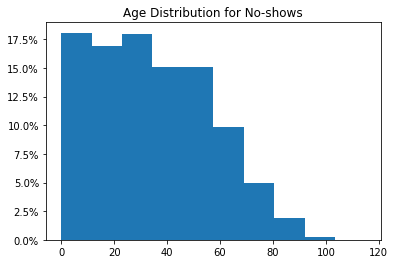

In [35]:
# Create a mask 
noshow= df.no_show == 1

# Mean age for no-shows
print('The mean age for patients not showing up for their appointment is', df.age[noshow].mean())

# Histogram for age distribution of no-shows
from matplotlib.ticker import PercentFormatter

age_noshow = df.age[noshow]
plt.hist(age_noshow, weights=np.ones(len(age_noshow)) / len(age_noshow))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Age Distribution for No-shows')

plt.show()

The mean age for patients showing up to their appointment is 37.790064393252315


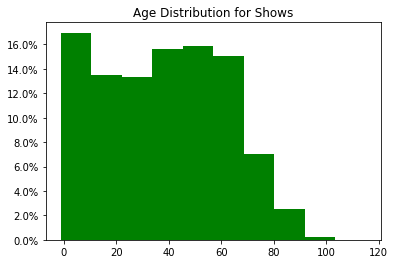

In [36]:
# Create a mask 
show = df.no_show == 0

# Mean age for shows
print('The mean age for patients showing up to their appointment is', df.age[show].mean())

# Histogram for age distribution of shows
age_show = df.age[show]
plt.hist(age_show, weights=np.ones(len(age_show)) / len(age_show), color='green')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Age Distribution for Shows')

plt.show()

The mean age for patients who failed to make to their appointment is 34. The mean age for patients who have showed up to their appointment is 37. The two graphs show that infants and small kids have both the highest no-shows and show-up rate as compared to other ages. For no-show appointments, patients aged around 0-30 seem to have the highest no-show rate.  For show-up appointments, patients aged around 40-70 seem to have the second highest no-show rate. 

<a id='conclusions'></a>
## Conclusions

- Out of the total 110,527 scheduled appointments, 20%(22,312) appointments were missed and 80%(88,168) were accomplished. 
- 32%(35,482) appointments received SMS out of total 110,527 appointments. It's surprising to see that for appointments with SMS reminder, 27.6% were missed, however only 16.7% were missed for appointments with NO SMS reminder. I was expecting the opposite result. It seems that SMS reminder is not helping patient to show-up to their appointemt at all.
- There are 10,861 appointments with Bolsa Familia, 10% of total 110,527 appointments. For appointments with Bolsa Familia 23.7% fail to come, while for appointments with NO Bolsa Familia, the ratio is 19.8%. This is no clear indication that Bolsa Familia has to do with appointment attendance. 
- JARDIM CAMBURI is the region with both highest and lowest number of attendance for the appointments. MARIA ORTIZ is the second highest in both cases. 
- The distribution for each health condition variable: hypertension, diabetes, alcoholism and handicap demonstrates similar patterns. The graphs all show around 20% no-show rate for patients with those health conditions. And for appointments made by patients without those health conditions, the no-show ratio was slightly lower than 20% for all other categories expect alcoholism. However, there's no clear indication that those variables are closely related to no-shows at this point. 
- The mean age for patients who failed to make to their appointment is 34. The mean age for patients who have showed up to their appointment is 37. The two graphs show that infants and small kids have both the highest no-shows and show-up rate as compared to other ages. For no-show appointments, patients aged around 0-30 seem to have the highest no-show rate.  For show-up appointments, patients aged around 40-70 seem to have the second highest no-show rate. 

### Limitations:
- There are 62,299 patients in the database, however the number of appointment is 110,527, meaning that there are patients with multiple appointments. Patients with repeated no-shows can greatly influence no-show rate and the result canbe baised. Patients with multiple appointments and patients with repeat no-shows should be further investigated and adjust the results so we can see how other factors influence no-shows.
- Patients may have multiple heath issues at the same time. The analysis of heath condition part did not consider this fact. 
- This project is only an exploratory analysis, correlations among different variables are not take into consideration. For example, age and health condition might be related. Gender and alcoholism might be related. More statistical analysis such as correlations can provide more insights. 
- JARDIM CAMBURI is the region with both the highest and lowest number of attendance for the appointments. Information on population of different regions can be helpful when investigating the reason why this neighbour has the hightest no-shows. 
- The timefame of this dataset is worth to be checked because seasonal factor can have great impact on the results, for example, no-show rate during holiday seasons can be much higher than other time of the year.  


### References: 
https://www.kaggle.com/joniarroba/noshowappointments
<br>https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457
<br>https://stackoverflow.com/questions/25205247/multiple-pie-charts-using-matplotlib/25205547
<br>https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
<br>https://stackoverflow.com/questions/44463147/making-different-plots-at-the-same-time-in-python
<br>https://stackoverflow.com/questions/50251750/how-to-normalize-a-seaborn-countplot-with-multiple-categorical-variables
<br>http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/
<br>https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
<br>https://stackoverflow.com/questions/53782908/how-to-plot-groupby-as-percentage-in-seaborn
<br>https://stackoverflow.com/questions/51473993/plot-an-histogram-with-y-axis-as-percentage-using-funcformatter
